In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 定义模拟参数
def simulate_turing():
    # 空间和时间参数
    Lx, Ly = 50, 50   # 空间域大小
    Nx, Ny = 100, 100 # 网格点数
    dx = Lx / (Nx-1)  # 空间步长
    dy = Ly / (Ny-1)
    dt = 0.001        # 时间步长
    T = 15.0          # 总模拟时间
    n_steps = int(T / dt)

    # 扩散系数 (D_v/D_u = D)
    D_u = 1.0
    D = 50.0          # 扩散系数比（需满足D > D_c）
    D_v = D * D_u

    # 反应动力学参数（根据式27-28）
    S_p = 1.0         # 设定参数p的函数S(p)=1（需满足S(p)≥0）
    F_prime = S_p + 1 # F' = S(p) + 1
    G_prime = 1.0     # G' = 1（需满足F' > G' > 0）

    # 初始化浓度场（稳态(1,1)加随机扰动）
    u = np.ones((Nx, Ny)) + 0.01 * np.random.randn(Nx, Ny)
    v = np.ones((Nx, Ny)) + 0.01 * np.random.randn(Nx, Ny)

    # 定义拉普拉斯算子（Neumann边界条件）
    def laplacian(Z, dx, dy):
        Ztop = Z[0:-2, 1:-1]   # 上边界
        Zbottom = Z[2:, 1:-1]   # 下边界
        Zleft = Z[1:-1, 0:-2]   # 左边界
        Zright = Z[1:-1, 2:]    # 右边界
        Zcenter = Z[1:-1, 1:-1]
        return (Ztop + Zbottom + Zleft + Zright - 4*Zcenter) / dx**2

    # 时间迭代
    for n in range(n_steps):
        # 计算拉普拉斯项
        lap_u = laplacian(u, dx, dy)
        lap_v = laplacian(v, dx, dy)

        # 计算反应项（式27-28）
        reaction_u = -u[1:-1, 1:-1] + (u[1:-1, 1:-1]**2) * v[1:-1, 1:-1]
        reaction_v = 2 + S_p * v[1:-1, 1:-1] - (S_p + 2) * u[1:-1, 1:-1] * v[1:-1, 1:-1]

        # 更新内部点（显式欧拉法）
        u[1:-1, 1:-1] += dt * (D_u * lap_u + reaction_u)
        v[1:-1, 1:-1] += dt * (D_v * lap_v + reaction_v)

        # Neumann边界条件：边界值等于相邻内部点值
        u[0, :] = u[1, :]    # 上边界
        u[-1, :] = u[-2, :]  # 下边界
        u[:, 0] = u[:, 1]    # 左边界
        u[:, -1] = u[:, -2]  # 右边界

        v[0, :] = v[1, :]
        v[-1, :] = v[-2, :]
        v[:, 0] = v[:, 1]
        v[:, -1] = v[:, -2]

        # 每1000步绘图
        if n % 1000 == 0:
            plt.imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
            plt.colorbar()
            plt.title(f"Time = {n*dt:.2f}")
            plt.show()

    return u, v


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_turing_optimized():
    # 调整后的参数
    Lx, Ly = 50, 50
    Nx, Ny = 100, 100
    dx = Lx / (Nx-1)
    dt = 0.001  # 增大时间步长
    T = 10.0   # 减少总时间
    n_steps = int(T / dt)
    
    D_u = 1.0
    D = 50.0
    D_v = D * D_u
    
    # 初始化
    u = np.ones((Nx, Ny)) + 0.01 * np.random.randn(Nx, Ny)
    v = np.ones((Nx, Ny)) + 0.01 * np.random.randn(Nx, Ny)
    
    # 矢量化拉普拉斯算子
    def laplacian(Z, dx, dy):
        return (np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
                np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1) - 4*Z) / dx**2
    
    plt.figure()
    for n in range(n_steps):
        lap_u = laplacian(u, dx, dx)
        lap_v = laplacian(v, dx, dx)
        
        reaction_u = -u + u**2 * v
        reaction_v = 2 + 1.0*v - 3*u*v  # S_p=1时的简化形式
        
        u += dt * (D_u * lap_u + reaction_u)
        v += dt * (D_v * lap_v + reaction_v)
        
        # 每100步绘图
        if n % 100 == 0:
            plt.clf()
            plt.imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
            plt.title(f"Time = {n*dt:.2f}")
            plt.pause(0.01)
    
    plt.show()
    return u, v


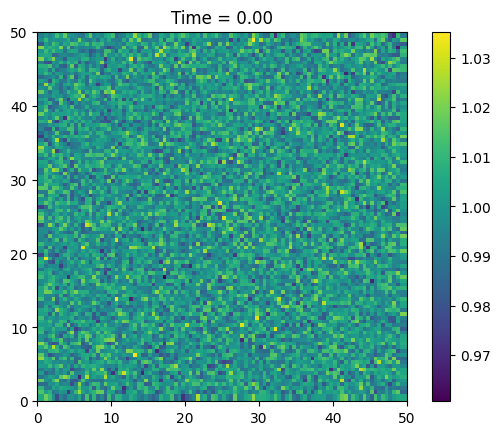

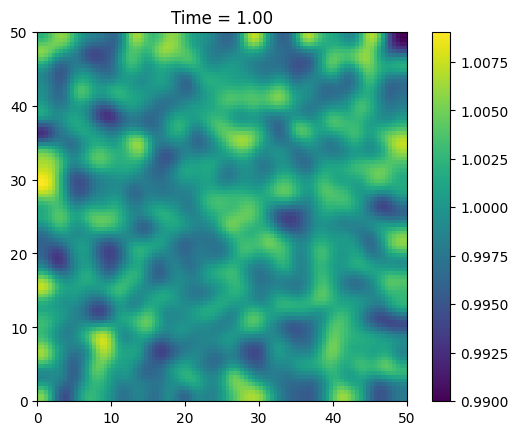

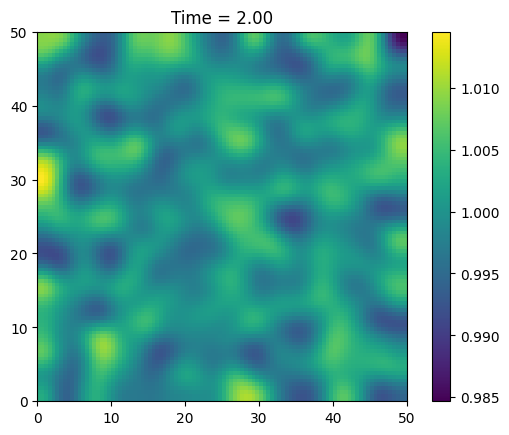

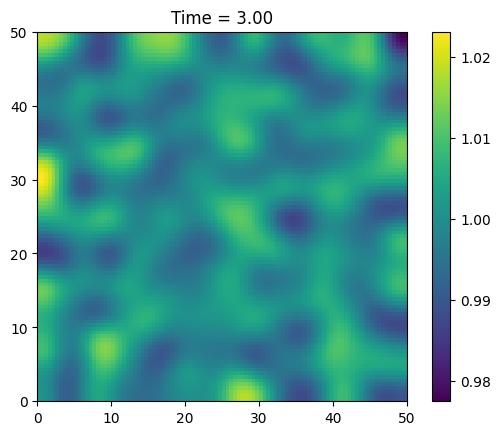

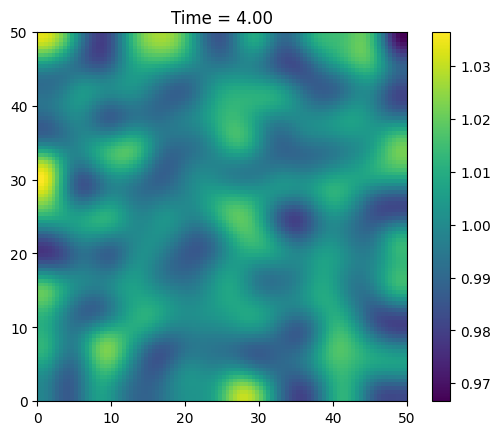

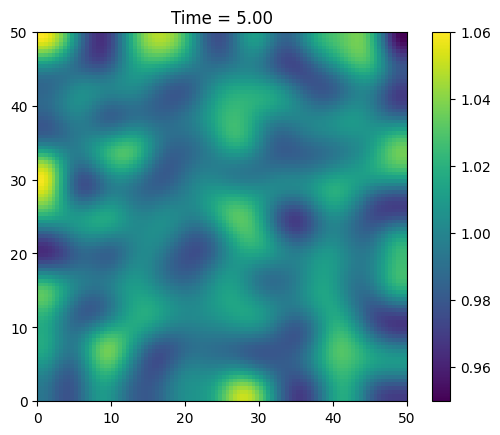

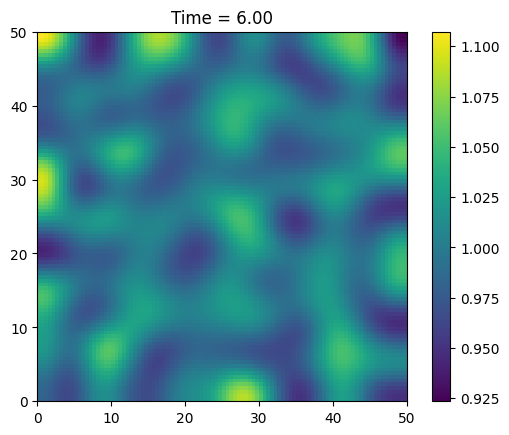

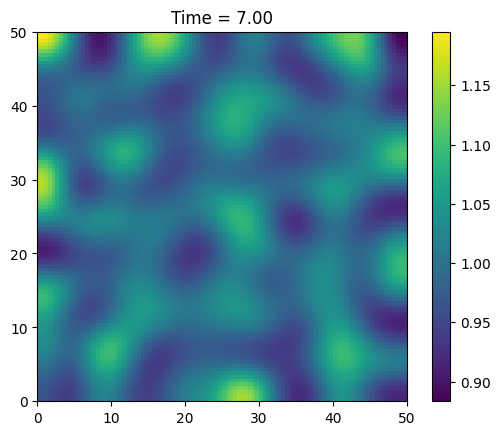

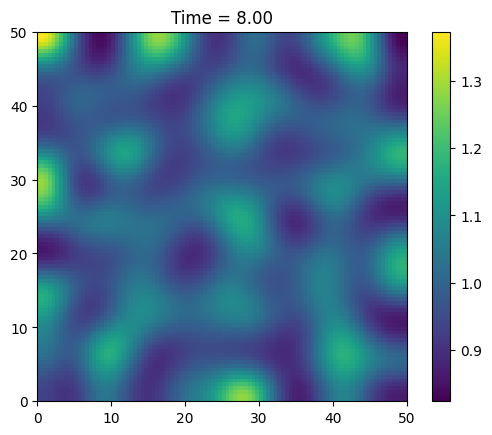

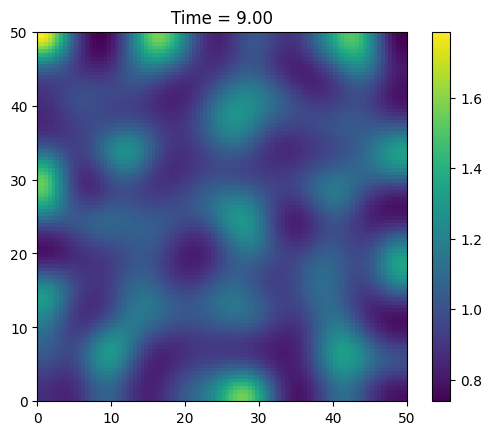

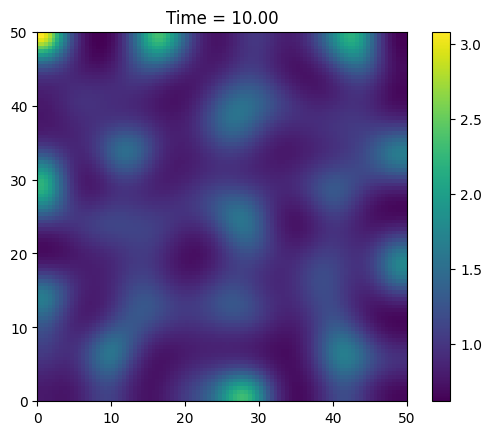

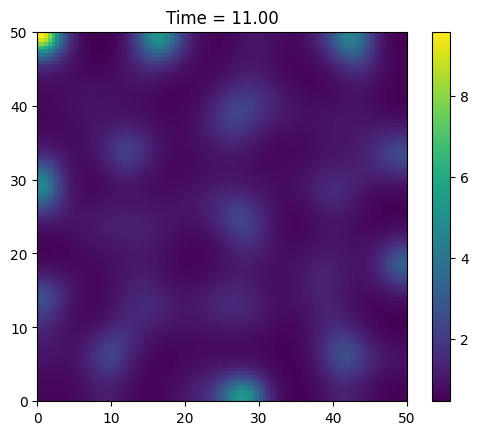

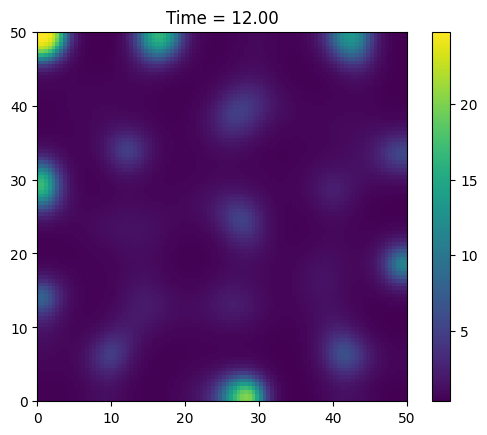

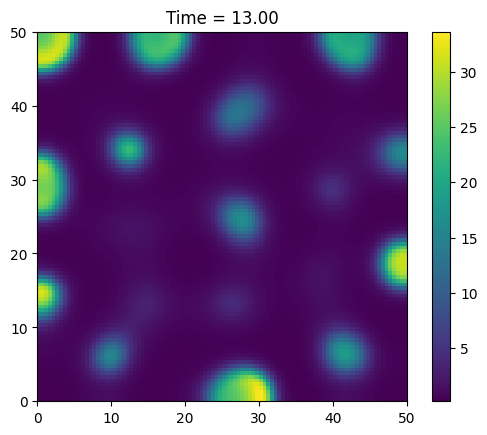

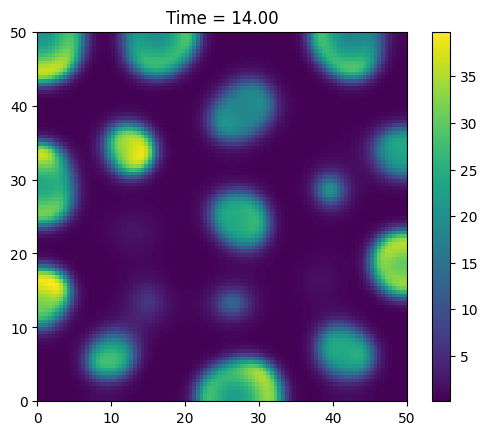

In [14]:
# 运行模拟
u_final, v_final = simulate_turing()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

def simulate_turing_jupyter():
    L = 50.0           # 空间域尺寸
    N = 100            # 网格点数
    dx = L / (N-1)     # 空间步长
    dt = 0.001          # 时间步长
    T = 30.0          # 总模拟时间
    n_steps = int(T/dt)
 
    D_u = 1.0          # u的扩散系数
    D_v = 50.0         # v的扩散系数（D=50满足D > D_c）
    S_p = 1.0          # 参数函数S(p)=1
    
    # 初始化浓度场（在稳态(1,1)附近添加5%随机扰动）
    u = np.ones((N, N)) + 0.05*np.random.normal(size=(N, N))
    v = np.ones((N, N)) + 0.05*np.random.normal(size=(N, N))

    fig, ax = plt.subplots(figsize=(8,6))
    img = ax.imshow(u, cmap='viridis', vmin=0.5, vmax=1.5, extent=[0,L,0,L])
    fig.colorbar(img, ax=ax)
    title = ax.set_title("Turing Pattern Formation at t = 0.00")
    plt.close(fig) 

    for n in range(n_steps):
        # 扩散项计算
        u_old = u.copy()
        v_old = v.copy()
        
        u[1:-1, 1:-1] += (D_u * dt/dx**2) * (
            u_old[1:-1, 2:] + u_old[1:-1, 0:-2] +
            u_old[2:, 1:-1] + u_old[0:-2, 1:-1] - 4*u_old[1:-1, 1:-1]
        )
        
        v[1:-1, 1:-1] += (D_v * dt/dx**2) * (
            v_old[1:-1, 2:] + v_old[1:-1, 0:-2] +
            v_old[2:, 1:-1] + v_old[0:-2, 1:-1] - 4*v_old[1:-1, 1:-1]
        )

        # u的反应项：-u + u²v
        u[1:-1,1:-1] += dt * (
            -u_old[1:-1,1:-1] + 
            (u_old[1:-1,1:-1]**2) * v_old[1:-1,1:-1]
        )
        
        # v的反应项：2 + S(p)v - (S(p)+2)uv
        v[1:-1,1:-1] += dt * (
            2 + 
            S_p * v_old[1:-1,1:-1] - 
            (S_p + 2) * u_old[1:-1,1:-1] * v_old[1:-1,1:-1]
        )

        # 边界条件(Neumann边界)
        u[:,0] = u[:,1]    # 左边界
        u[:,-1] = u[:,-2]  # 右边界
        u[0,:] = u[1,:]    # 上边界
        u[-1,:] = u[-2,:]  # 下边界
        
        v[:,0] = v[:,1]
        v[:,-1] = v[:,-2]
        v[0,:] = v[1,:]
        v[-1,:] = v[-2,:]

        if n % 50 == 0:
            # 更新图像
            img.set_data(u)
            img.set_clim(vmin=u.min(), vmax=u.max()) 
            title.set_text(f"Turing Pattern Formation at t = {n*dt:.2f}")
            display.clear_output(wait=True)
            display.display(fig)
            
    display.clear_output(wait=True)
    return u, v


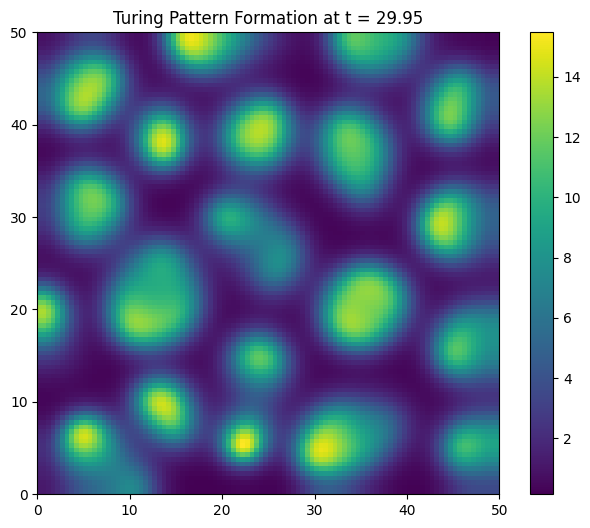

In [11]:
u_final, v_final = simulate_turing_jupyter()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_turing_jupyter():
    L = 50.0           # 空间域尺寸
    N = 100            # 网格点数
    dx = L / (N-1)     # 空间步长
    dt = 0.001          # 时间步长
    T = 20.0          # 总模拟时间
    n_steps = int(T/dt)
    
    D_u = 1.0          # u的扩散系数
    D_v = 50.0         # v的扩散系数（D=50满足D > D_c）
    S_p = 1.0          # 参数函数S(p)=1
    
    # 初始化浓度场（在稳态(1,1)附近添加5%随机扰动）
    u = np.ones((N, N)) + 0.05*np.random.normal(size=(N, N))
    v = np.ones((N, N)) + 0.05*np.random.normal(size=(N, N))

    fig, ax = plt.subplots(figsize=(8,6))
    img = ax.imshow(u, cmap='viridis', vmin=0.5, vmax=1.5, extent=[0,L,0,L])
    fig.colorbar(img, ax=ax)
    plt.close(fig) 

    # 时间点列表（例如：在1秒、5秒、10秒时生成图像）
    display_times = [3.0, 6.0, 9.0, 12.0, 15.0, 18.0]

    for n in range(n_steps):
        # 扩散项计算
        u_old = u.copy()
        v_old = v.copy()
        
        u[1:-1, 1:-1] += (D_u * dt/dx**2) * (
            u_old[1:-1, 2:] + u_old[1:-1, 0:-2] +
            u_old[2:, 1:-1] + u_old[0:-2, 1:-1] - 4*u_old[1:-1, 1:-1]
        )
        
        v[1:-1, 1:-1] += (D_v * dt/dx**2) * (
            v_old[1:-1, 2:] + v_old[1:-1, 0:-2] +
            v_old[2:, 1:-1] + v_old[0:-2, 1:-1] - 4*v_old[1:-1, 1:-1]
        )

        # u的反应项：-u + u²v
        u[1:-1,1:-1] += dt * (
            -u_old[1:-1,1:-1] + 
            (u_old[1:-1,1:-1]**2) * v_old[1:-1,1:-1]
        )
        
        # v的反应项：2 + S(p)v - (S(p)+2)uv
        v[1:-1,1:-1] += dt * (
            2 + 
            S_p * v_old[1:-1,1:-1] - 
            (S_p + 2) * u_old[1:-1,1:-1] * v_old[1:-1,1:-1]
        )

        # 边界条件(Neumann边界)
        u[:,0] = u[:,1]    # 左边界
        u[:,-1] = u[:,-2]  # 右边界
        u[0,:] = u[1,:]    # 上边界
        u[-1,:] = u[-2,:]  # 下边界
        
        v[:,0] = v[:,1]
        v[:,-1] = v[:,-2]
        v[0,:] = v[1,:]
        v[-1,:] = v[-2,:]

        current_time = n * dt  # 当前仿真时间

        # 在指定时间点保存并显示图像
        if current_time in display_times:
            print(f"Displaying pattern at t = {current_time:.2f}")
            fig, ax = plt.subplots(figsize=(8,6))
            img = ax.imshow(u, cmap='viridis', extent=[0,L,0,L])
            ax.set_title(f"Turing Pattern at t = {current_time:.2f}")
            plt.colorbar(img, ax=ax)
            plt.show()

            # 为避免重复显示，移除已处理的时间点
            display_times.remove(current_time)

    return u, v

Displaying pattern at t = 3.00


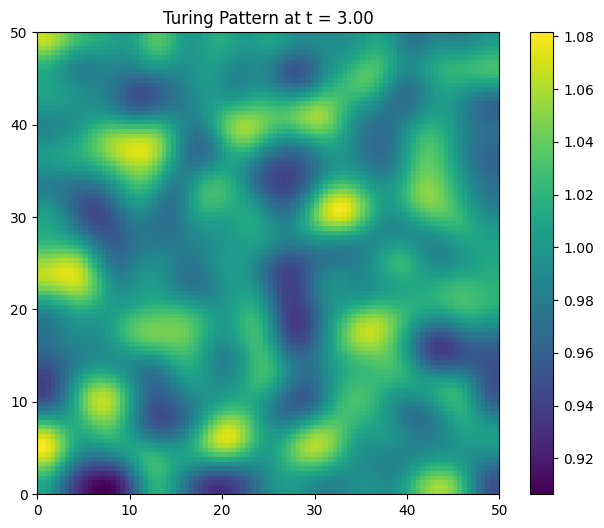

Displaying pattern at t = 6.00


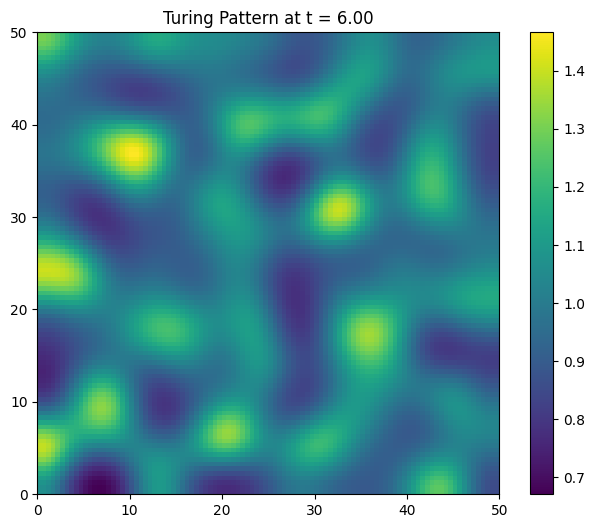

Displaying pattern at t = 9.00


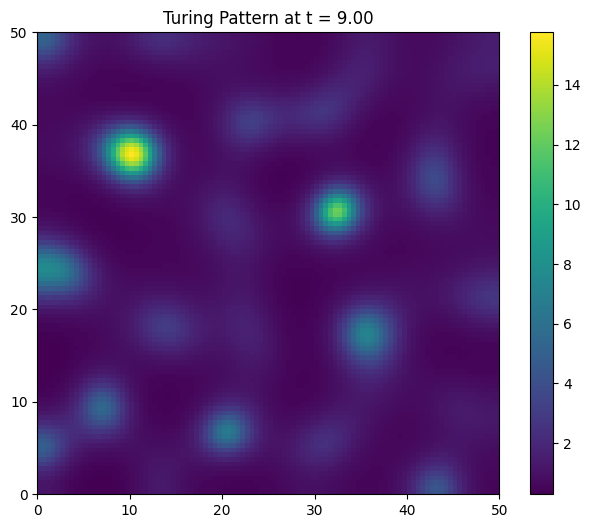

Displaying pattern at t = 12.00


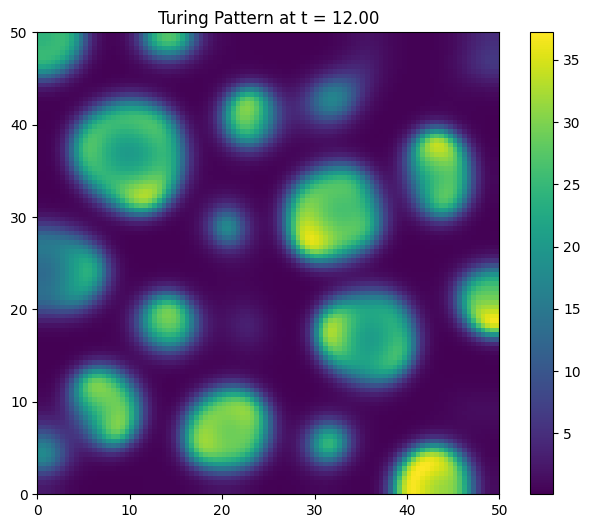

Displaying pattern at t = 15.00


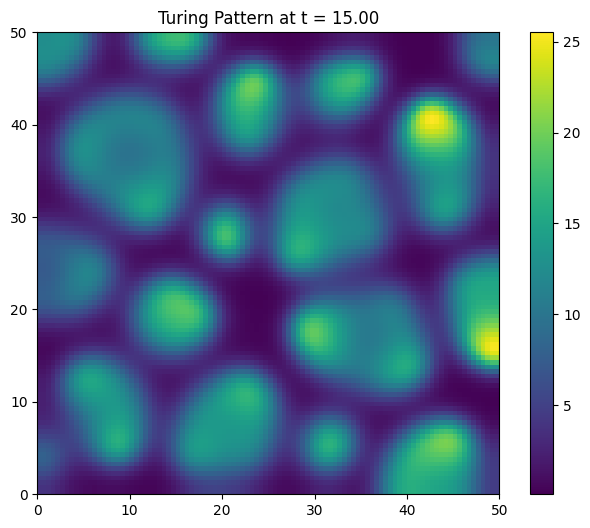

Displaying pattern at t = 18.00


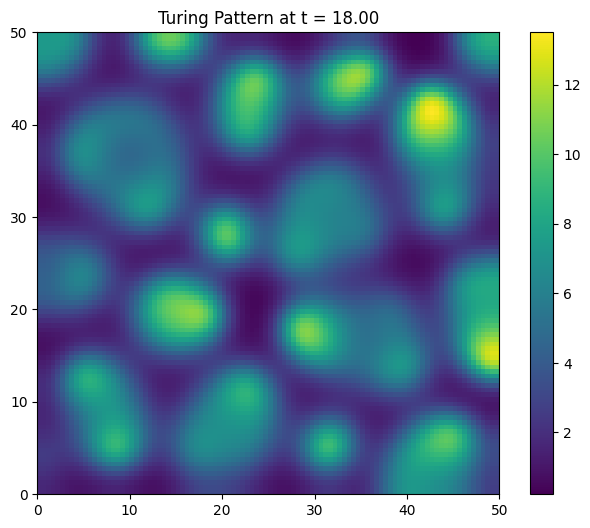

In [13]:
u_final, v_final = simulate_turing_jupyter()